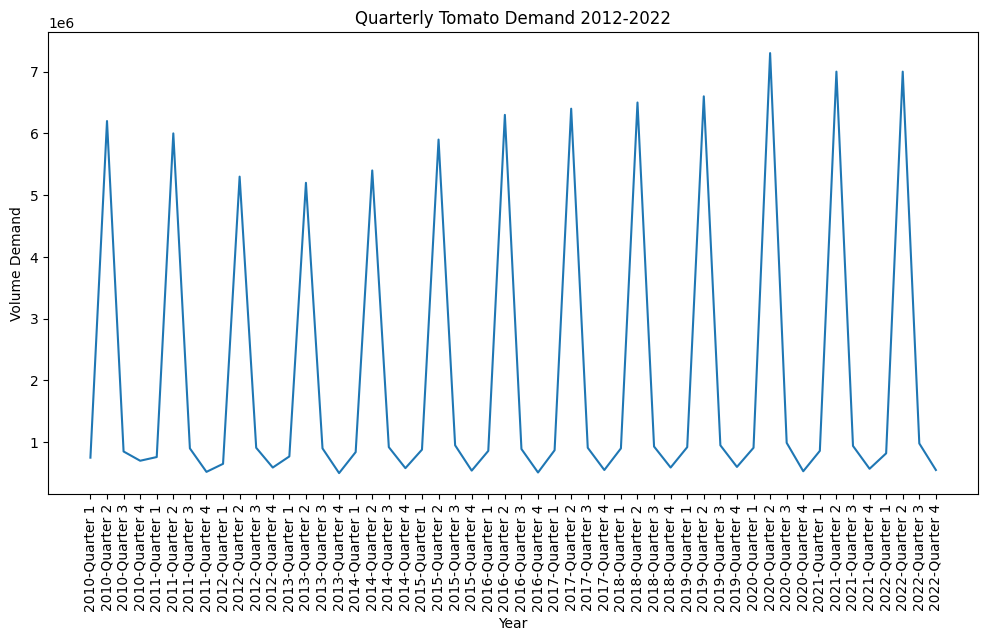

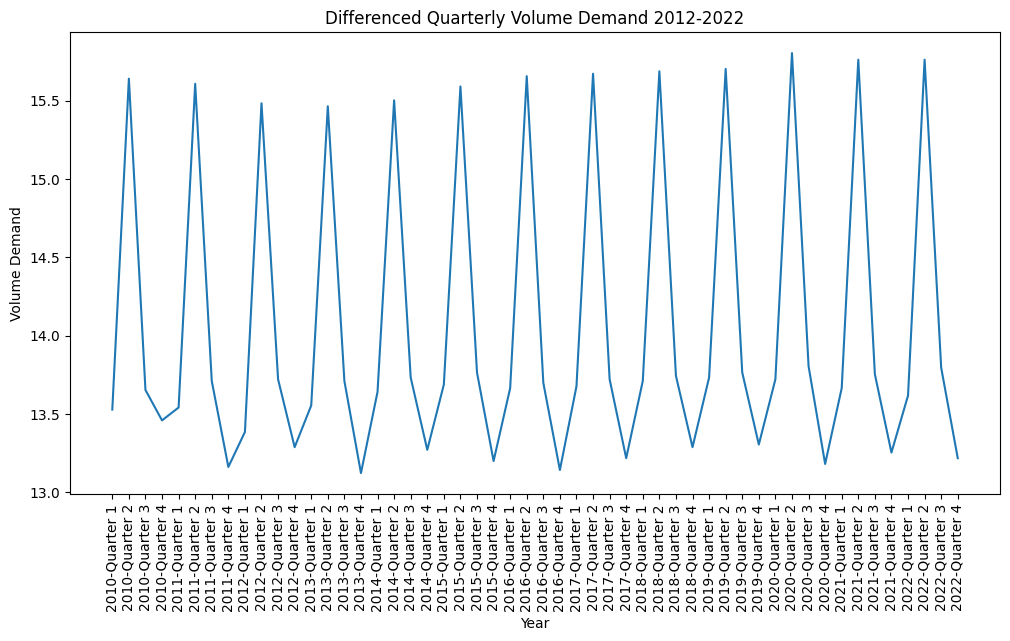

First ADF Test:
ADF Statistic: -1.0123762628720654
p-value: 0.7487236215085794
Critical Values:
1%:-3.653519805908203
5%:-2.9572185644531253
10%:-2.6175881640625

Second ADF Test(after differencing):
ADF Statistic: -107.07245581722137
p-value: 0.0
Critical Values:
1%:-3.653519805908203
5%:-2.9572185644531253
10%:-2.6175881640625


C:\Users\Tani-kun\Documents\GitHub\sample-python\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Tani-kun\Documents\GitHub\sample-python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       VolumeDemand_log   No. Observations:                   36
Model:                 ARIMA(4, 1, 0)   Log Likelihood                  20.476
Date:                Tue, 20 Jun 2023   AIC                            -30.952
Time:                        19:08:55   BIC                            -23.175
Sample:                             0   HQIC                           -28.267
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1089      0.158     -0.688      0.491      -0.419       0.201
ar.L2         -0.1060      0.161     -0.659      0.510      -0.421       0.209
ar.L3         -0.1028      0.164     -0.626      0.5

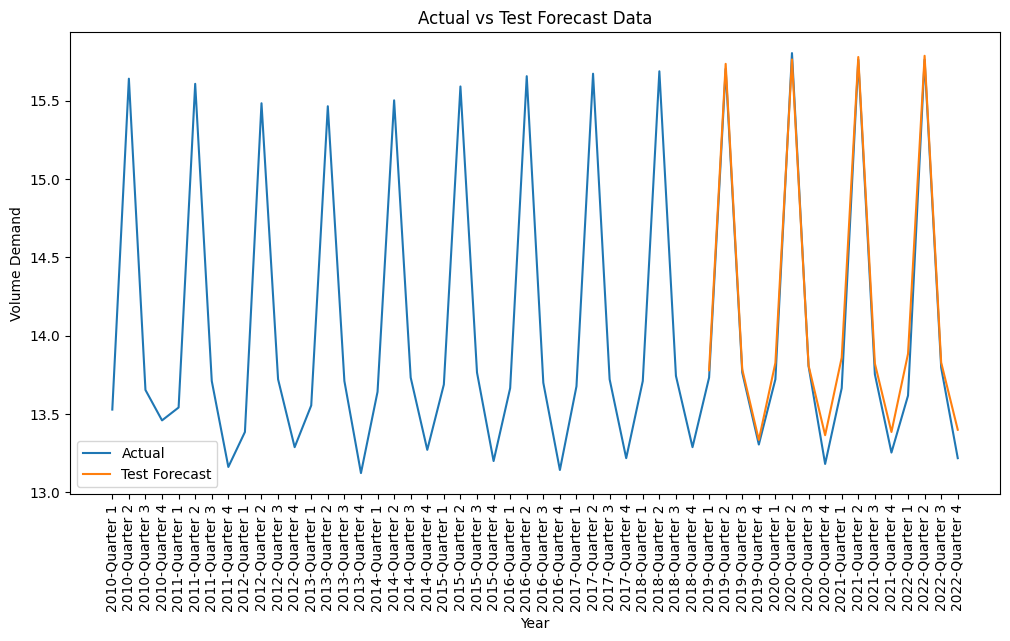


Mean Absolute Error (MAE): 0.08617734436375601
Mean Absolute Percentage Error (MAPE): 0.006314925437130938
Root Mean Squared Error (RMSE): 0.1164100026515987

Enter the number of years ahead to predict: 12


C:\Users\Tani-kun\Documents\GitHub\sample-python\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


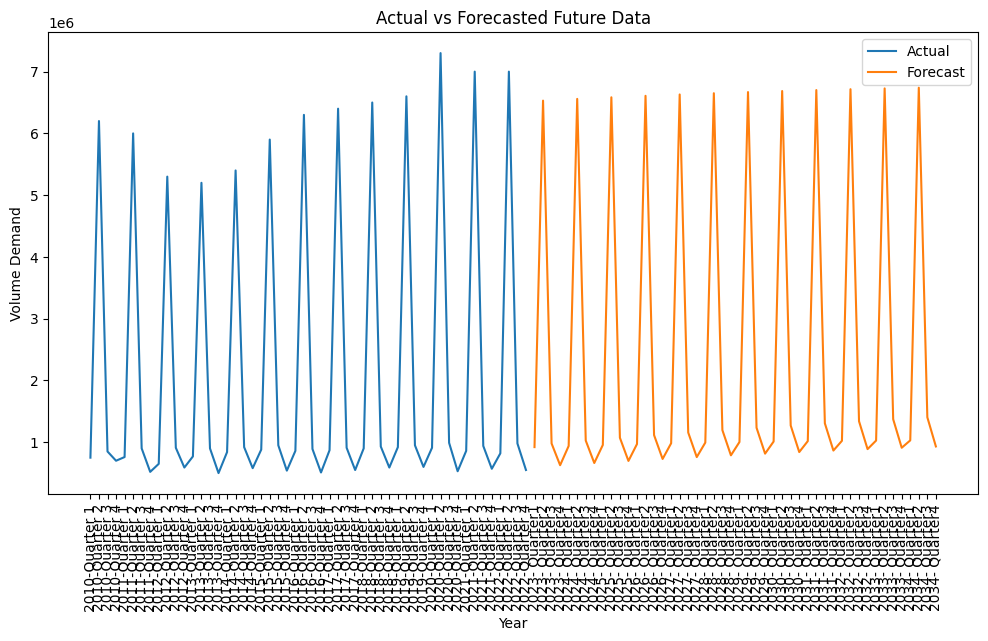


Predicted Future Data
    Year  Quarter  Prediction
36  2023        1      920755
37  2023        2     6530377
38  2023        3      979525
39  2023        4      627759
40  2024        1      939282
41  2024        2     6558451
42  2024        3     1026810
43  2024        4      663427
44  2025        1      955725
45  2025        2     6584363
46  2025        3     1071995
47  2025        4      697140
48  2026        1      970221
49  2026        2     6608250
50  2026        3     1115211
51  2026        4      729028
52  2027        1      982898
53  2027        2     6630236
54  2027        3     1156581
55  2027        4      759212
56  2028        1      993875
57  2028        2     6650439
58  2028        3     1196221
59  2028        4      787806
60  2029        1     1003264
61  2029        2     6668969
62  2029        3     1234237
63  2029        4      814914
64  2030        1     1011171
65  2030        2     6685930
66  2030        3     1270732
67  2030        4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Load the data
data = pd.read_csv('csv/VolumeDemand.csv')

# To avoid using scientific notation
pd.set_option('display.float_format', lambda x: '%d' % x)

# Convert 'Year' column to string type
data['Year'] = data['Year'].astype(str)
# Create a new column combining 'Year' and 'TimePeriod'
data['YearQuarter'] = data['Year'] + '-' + data['TimePeriod']

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['YearQuarter'], data['VolumeDemand'])
plt.xlabel('Year')
plt.ylabel('Volume Demand')
plt.title('Quarterly Tomato Demand 2012-2022')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Take the logarithm of the 'AreaHarvested' column
data['VolumeDemand_log'] = np.log(data['VolumeDemand'])

# Plot the logarithm of the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['YearQuarter'], data['VolumeDemand_log'])
plt.xlabel('Year')
plt.ylabel('Volume Demand')
plt.title('Differenced Quarterly Volume Demand 2012-2022')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

train_data = data['VolumeDemand_log'].iloc[:int(len(data) * 0.7)]

# Step 2: Check for stationarity and determine ARIMA model parameters

# Perform the ADF test
print('First ADF Test:')
result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}:{value}')
    
# Difference time series data for stationarity
train_data_diff = train_data.diff().dropna()

# Perform the ADF test
print('\nSecond ADF Test(after differencing):')
result = adfuller(train_data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}:{value}')

# Step 3: Fit the ARIMA model
model = ARIMA(train_data, order=(4, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

# Step 4: Make time series predictions
test_data = data['VolumeDemand_log'].iloc[int(len(data) * 0.7):]
forecast = model_fit.forecast(steps=len(test_data))

# Step 5: Combine actual and forecasted data for plotting
combined_data = pd.concat([data[['YearQuarter', 'VolumeDemand_log']], pd.Series(forecast)], axis=1)
combined_data.columns = ['Year', 'Actual', 'Forecast']

# Plot the actual and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Year'], combined_data['Actual'], label='Actual')
plt.plot(combined_data['Year'], combined_data['Forecast'], label='Test Forecast')
plt.xlabel('Year')
plt.ylabel('Volume Demand')
plt.title('Actual vs Test Forecast Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()

# Step 6: Evaluate model predictions
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test_data, forecast)
mape = mean_absolute_percentage_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print('\nMean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Root Mean Squared Error (RMSE):', rmse)

# Make actual predictions
# User input for prediction
num_years = int(input('\nEnter the number of years ahead to predict: '))

# Fit the ARIMA model using the actual series
train_data = data['VolumeDemand'].iloc[:int(len(data) * 0.7)]
model = ARIMA(train_data, order=(4, 1, 0))
model_fit = model.fit()

# Step 7: Make actual predictions on future data
last_year = int(data['Year'].iloc[-1])
last_year = last_year + 1
future_years = pd.date_range(start=f'{last_year}-01-01', periods=num_years * 4, freq='Q')
future_forecast = pd.Series(model_fit.forecast(steps=num_years * 4))

# Create the prediction DataFrame
prediction_df = pd.DataFrame({'Year': future_years.year, 'Quarter': future_years.quarter, 'Prediction': future_forecast})

# Step 8: Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(data['YearQuarter'], data['VolumeDemand'], label='Actual')
plt.plot(prediction_df['Year'].astype(str) + '- Quarter' + prediction_df['Quarter'].astype(str), prediction_df['Prediction'], label='Forecast')
plt.xlabel('Year')
plt.ylabel('Volume Demand')
plt.title('Actual vs Forecasted Future Data')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Print the prediction
print('\nPredicted Future Data')
print(prediction_df)

# Step 9: Get percentage change
print('\nPercent change:')
start_index = 0
for i in range(4):
    end_index = -(4 - i)
    pd_change = (prediction_df['Prediction'].iloc[end_index] - prediction_df['Prediction'].iloc[start_index]) / prediction_df['Prediction'].iloc[start_index]
    print('Q{} {}-{}: {:.2f}%'.format(i+1, prediction_df['Year'].iloc[start_index], prediction_df['Year'].iloc[end_index], pd_change*100))
    start_index += 1


### 